# Using Different Data Sets

### 311 Service Requests in NYC
NYC311 can provide you access to non-emergency City services and information about City government programs. NYC311 can help with a broad range of services, including things like homeless person assistance, pothole repair, or help understanding a property tax bill.

**The goal of this exercise is the count the number of noise complaints in New York City by neighborhood.**

In [1]:
# Analysis
import geopandas as gpd
import pandas as pd
from numpy.random import seed
import os
import numpy as np

# Graphics
import matplotlib.pyplot as plt
from matplotlib import colors

import seaborn as sns
from pysal.viz import splot
from splot.esda import plot_moran
import contextily as ctx

sns.set_context(context='paper')

## warnings is a module that allows you to filter warnings
import warnings
## we are going to ignore all warnings (so they won't print)
warnings.filterwarnings("ignore")

In [2]:
path = os.getcwd
os.chdir( '/Users/yujinlee/Documents/Summer 2024/CRP3850/Week2_7')

In [3]:
##For this exercise, we are using Application Programming Interfaces (APIs) to import information. APIs allow softwares to talk to each other. 
##That is why Python can bring in data from the NYC Open Data just with the link

nyc_311_url = "https://data.cityofnewyork.us/resource/erm2-nwe9.json"
nyc_311 = pd.read_json(nyc_311_url)

##show the first five rows of the dataframe
nyc_311.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,intersection_street_1,intersection_street_2,address_type,...,landmark,bbl,vehicle_type,closed_date,bridge_highway_name,bridge_highway_segment,taxi_pick_up_location,bridge_highway_direction,road_ramp,taxi_company_borough
0,61389987,2024-06-07T02:22:29.000,DOT,Department of Transportation,Street Condition,Pothole,10023.0,BROADWAY,WEST 60 STREET,INTERSECTION,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,61394347,2024-06-07T01:51:32.000,NYPD,New York City Police Department,Encampment,N/A,10013.0,LEONARD STREET,FRANKLIN STREET,ADDRESS,...,LAFAYETTE STREET,1.001710e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61391397,2024-06-07T01:51:28.000,DPR,Department of Parks and Recreation,Damaged Tree,Tree Leaning/Uprooted,10306.0,BEND,ST GEORGE ROAD,ADDRESS,...,LIGHTHOUSE AVENUE,5.022670e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,61392692,2024-06-07T01:50:38.000,NYPD,New York City Police Department,Blocked Driveway,Partial Access,10306.0,LUIGI PLACE,DEAD END,ADDRESS,...,BEACON AVENUE,5.009480e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,61392849,2024-06-07T01:50:34.000,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,11215.0,3 AVENUE,4 AVENUE,ADDRESS,...,12 STREET,3.010210e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
##we are interested in looking at the different neighborhoods (i.e. Manhattan, Bronx, Queens... etc.). 
##Identify the column that has that information and show the first five rows of that specific column

nyc_311.columns
nyc_311['park_borough'].head()

0        MANHATTAN
1        MANHATTAN
2    STATEN ISLAND
3    STATEN ISLAND
4         BROOKLYN
Name: park_borough, dtype: object

In [5]:
## Now that we have identified the neighborhoods, can we find the complaint types and make a separate dataframe with only noise-complaints?

noise_311 = nyc_311.loc[nyc_311['complaint_type'].apply(lambda x: 'Noise -' in x),:]
noise_311.head()

,unique_key,created_date,agency,agency_name,complaint_type,descriptor,incident_zip,intersection_street_1,intersection_street_2,address_type,...,landmark,bbl,vehicle_type,closed_date,bridge_highway_name,bridge_highway_segment,taxi_pick_up_location,bridge_highway_direction,road_ramp,taxi_company_borough
5,61392912,2024-06-07T01:50:34.000,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,11207.0,MOFFAT STREET,CHAUNCEY STREET,ADDRESS,...,CENTRAL AVENUE,3.034470e+09,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,61396950,2024-06-07T01:49:30.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10459.0,TIFFANY STREET,BARRETTO STREET,ADDRESS,...,SOUTHERN BOULEVARD,2.027330e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,61391546,2024-06-07T01:49:19.000,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,11203.0,ALBANY AVENUE,TROY AVENUE,ADDRESS,...,FENIMORE STREET,3.048130e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,61394233,2024-06-07T01:48:37.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,10460.0,EAST 179 STREET,SOUTHERN BOULEVARD,ADDRESS,...,MARMION AVENUE,2.031080e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,61390283,2024-06-07T01:45:57.000,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,11225.0,STERLING STREET,LEFFERTS AVENUE,ADDRESS,...,NEW YORK AVENUE,3.013220e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
## we are interested in the number of noise complaints in each neighborhood. Which neighborhood has the most noise complaints?

noise_311.groupby('park_borough')[['complaint_type']].count()


,complaint_type
park_borough,
BRONX,103
BROOKLYN,119
MANHATTAN,145
QUEENS,93
STATEN ISLAND,11


## Week2_6+7 Spatial Data
### GeoDataFrame 
#### The goal of this exercise is to create a map that shows noise complaints per borough in New York City. The map should be color coded based on the borough and have a gradient scale based on the number of noise complaints. 

We are now going to convert the dataframe for all 311 noise complaint cases 

In [7]:
noise_311.columns

Index(['unique_key', 'created_date', 'agency', 'agency_name', 'complaint_type',
       'descriptor', 'incident_zip', 'intersection_street_1',
       'intersection_street_2', 'address_type', 'city', 'facility_type',
       'status', 'resolution_description', 'resolution_action_updated_date',
       'community_board', 'borough', 'x_coordinate_state_plane',
       'y_coordinate_state_plane', 'open_data_channel_type',
       'park_facility_name', 'park_borough', 'latitude', 'longitude',
       'location', ':@computed_region_efsh_h5xi',
       ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_7mpf_4k6g', 'location_type', 'incident_address',
       'street_name', 'cross_street_1', 'cross_street_2', 'landmark', 'bbl',
       'vehicle_type', 'closed_date', 'bridge_highway_name',
       'bridge_highway_segment', 'taxi_pick_up_location',
       'bridge_highway_direction', 'road_ramp', 'taxi

In [8]:
noise_311[['x_coordinate_state_plane', 'y_coordinate_state_plane', 'latitude', 'longitude']]

,x_coordinate_state_plane,y_coordinate_state_plane,latitude,longitude
5,1010362.0,189623.0,40.687110,-73.905847
7,1013628.0,237527.0,40.818584,-73.893861
8,1001580.0,179557.0,40.659502,-73.937538
10,1015907.0,247072.0,40.844774,-73.885582
12,998693.0,180792.0,40.662897,-73.947941
...,...,...,...,...
991,1005951.0,235679.0,40.813534,-73.921603
992,982972.0,200210.0,40.716207,-74.004610
993,998129.0,226124.0,40.787323,-73.949880
996,1022150.0,264035.0,40.891308,-73.862922


In [9]:
# define geometry first 
geometry = gpd.points_from_xy(noise_311.longitude, noise_311.latitude, crs="EPSG:4326")

In [10]:
# Now change the dataframe to a geodataframe

noise_311_geo = gpd.GeoDataFrame(noise_311, 
                   crs="EPSG:4326",
                   geometry = geometry
                  )

<Axes: title={'center': 'Noise Complaints in NYC'}, xlabel='longitude', ylabel='latitude'>

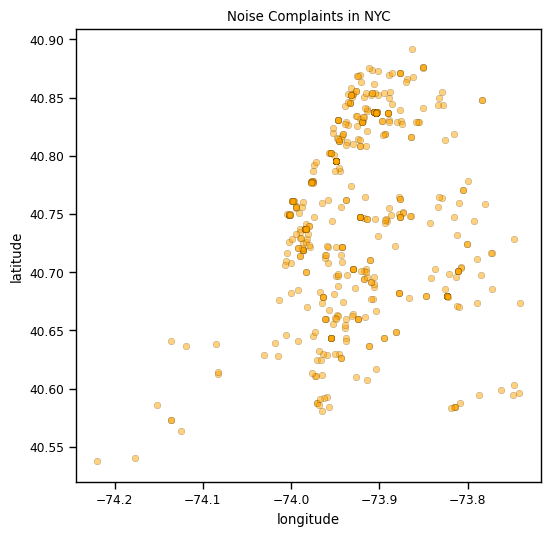

In [11]:
# Now try to plot the incidents of noise complaints on a map just to see what we made
# color of points should be orange, with a transparency of 0.5

fig, ax = plt.subplots(figsize=(6, 6))
plt.title('Noise Complaints in NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')

noise_311_geo.plot( color='orange', alpha = 0.5, edgecolor='black', linewidth = 0.2, ax = ax)

#### This map doesn't have a basemap so let me bring in the basemap from yesterday's class. 

In [12]:
#Bring in the '2020 Census Tracts.zip' from Week2_6 Lecture 

gdf_CT = gpd.read_file('2020 Census Tracts.zip')
gdf_CT = gdf_CT.to_crs(epsg=4326)

<Axes: title={'center': 'Noise Complaints in NYC'}, xlabel='longitude', ylabel='latitude'>

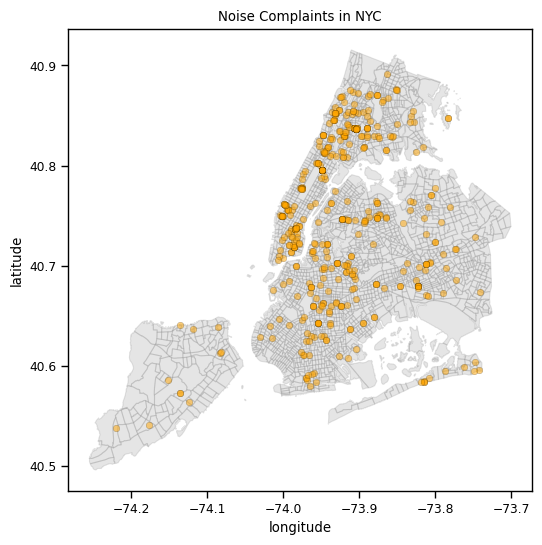

In [13]:
#Now let's plot the points with the basemap and noise complaint points

fig, ax = plt.subplots(figsize=(6,6))

gdf_CT.plot(color ='gray', alpha = 0.2, edgecolor = 'gray', ax=ax)

plt.title('Noise Complaints in NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')

noise_311_geo.plot( color='orange', alpha = 0.5, edgecolor='black', linewidth = 0.2, ax = ax)

#### But what if we wanted to plot noise complaints by borough?

We will now clean the datasets to be able to merge 311 noise complaints with census tract data
1) First, working with census tract data, we will dissolve geometries located within the same borough
2) Next, we will make a separate data set that only includes borough name and count of complaints
3) We will merge the two data sets and then assign it to a geodataframe
4) Lastly, we will plot the data! 

In [14]:
gdf_CT.head()

,ctlabel,borocode,boroname,ct2020,boroct2020,cdeligibil,ntaname,nta2020,cdta2020,cdtaname,geoid,shape_leng,shape_area,geometry
0,1,1,Manhattan,000100,1000100,NaN,The Battery-Governors Island-Ellis Island-Libe...,MN0191,MN01,MN01 Financial District-Tribeca (CD 1 Equivalent),36061000100,10833.043929,1.843005e+06,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,2.01,1,Manhattan,000201,1000201,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000201,4754.495247,9.723121e+05,"POLYGON ((-73.98450 40.70951, -73.98655 40.709..."
2,6,1,Manhattan,000600,1000600,NaN,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,6976.286215,2.582705e+06,"POLYGON ((-73.99022 40.71440, -73.98934 40.714..."
3,14.01,1,Manhattan,001401,1001401,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001401,5075.332000,1.006117e+06,"POLYGON ((-73.98837 40.71645, -73.98754 40.716..."
4,14.02,1,Manhattan,001402,1001402,NaN,Lower East Side,MN0302,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061001402,4459.156019,1.226206e+06,"POLYGON ((-73.98507 40.71908, -73.98423 40.718..."


In [15]:
#First, we dissolve the geometry by 'boroname'
nyc_CT = gdf_CT[['boroname', 'geometry']]
nyc_boro = nyc_CT.dissolve(by = 'boroname')
nyc_boro.reset_index()

,boroname,geometry
0,Bronx,"MULTIPOLYGON (((-73.90219 40.80479, -73.90223 ..."
1,Brooklyn,"MULTIPOLYGON (((-74.00198 40.56960, -74.00209 ..."
2,Manhattan,"MULTIPOLYGON (((-74.00843 40.68602, -74.00851 ..."
3,Queens,"MULTIPOLYGON (((-73.90182 40.55679, -73.90204 ..."
4,Staten Island,"MULTIPOLYGON (((-74.22229 40.50257, -74.22234 ..."


In [16]:
### From the question above that asked you to count the number of noise complaints per borough, create a separate data frame with the borough and counts
### name data frame as 'noise_count'
### rename the column from 'complaint_type' to 'complaint_count'

noise_count = noise_311.groupby('park_borough')[['complaint_type']].count()
noise_count.rename(columns={'complaint_type': 'complaint_count'})

,complaint_count
park_borough,
BRONX,103
BROOKLYN,119
MANHATTAN,145
QUEENS,93
STATEN ISLAND,11


In [17]:
### We're going to now merge the number of complains with the nyc_boro geo data 

#after identifying the common name ( which should be boroname), we will conduct a merge on the common column
boro_noise = pd.merge(noise_count, nyc_boro, left_on = "park_borough", right_on = "boroname")
boro_noise.head()

,complaint_type,geometry


#### The merge didn't work. Why didn't it?

In [35]:
### Let's recreate a new dataframe for the noise count

data = {'park_borough' : ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], 'complaint_count' : [103, 119, 145, 93, 11]}
noise_count = pd.DataFrame(data =data)
noise_count

noise_count.sort_values(by= "complaint_count", ascending = False)

,park_borough,complaint_count
2,Manhattan,145
1,Brooklyn,119
0,Bronx,103
3,Queens,93
4,Staten Island,11


In [20]:
### Let's try doing the merge again now

boro_noise = pd.merge(noise_count, nyc_boro, left_on = "park_borough", right_on = "boroname")
boro_noise.head()

,park_borough,complaint_count,geometry
0,Bronx,103,"MULTIPOLYGON (((-73.90219 40.80479, -73.90223 ..."
1,Brooklyn,119,"MULTIPOLYGON (((-74.00198 40.56960, -74.00209 ..."
2,Manhattan,145,"MULTIPOLYGON (((-74.00843 40.68602, -74.00851 ..."
3,Queens,93,"MULTIPOLYGON (((-73.90182 40.55679, -73.90204 ..."
4,Staten Island,11,"MULTIPOLYGON (((-74.22229 40.50257, -74.22234 ..."


In [21]:
### Make boro_noise into a geodataframe 

boro_noise_geo= gpd.GeoDataFrame(boro_noise,
                                 crs = 'EPSG:4326',
                                 geometry= 'geometry'
                                )


Text(30.791666666666664, 0.5, 'latitude')

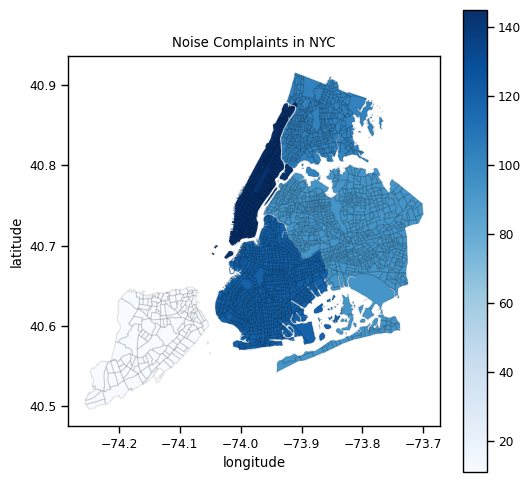

In [29]:
### Now what happens when we try to plot the data?

fig, ax = plt.subplots(figsize = (6,6))

boro_noise_geo.plot(column = 'complaint_count', 
                    legend = True,
                    cmap = 'Blues',
                    ax=ax)

gdf_CT.plot(color ='none', alpha = 0.1, edgecolor = 'black', ax=ax)

plt.title('Noise Complaints in NYC')
plt.xlabel('longitude')
plt.ylabel('latitude')